#### Prepare the data

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# read the bike data
df2 = pd.read_csv('../data/dc_bikes.csv', parse_dates=['datetime'], index_col=0)

In [3]:
df2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67


#### Check the number of weather types

In [7]:
# Print out the unique values in the weather column
df2['weather']

datetime
2011-01-01 00:00:00    1
2011-01-01 01:00:00    1
2011-01-01 02:00:00    1
2011-01-01 03:00:00    1
2011-01-01 04:00:00    1
                      ..
2012-12-31 19:00:00    2
2012-12-31 20:00:00    2
2012-12-31 21:00:00    1
2012-12-31 22:00:00    1
2012-12-31 23:00:00    1
Name: weather, Length: 17379, dtype: int64

#### Create a dataframe with weather related data only ('temp', 'atemp', 'humidity', 'windspeed')

In [8]:
# Create a subset of the dataframe with only given columns
df2_reloaded = df2[['temp', 'atemp', 'humidity', 'windspeed']]

In [9]:
df2_reloaded

,temp,atemp,humidity,windspeed
datetime,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000
2011-01-01 01:00:00,9.02,13.635,80,0.0000
2011-01-01 02:00:00,9.02,13.635,80,0.0000
2011-01-01 03:00:00,9.84,14.395,75,0.0000
2011-01-01 04:00:00,9.84,14.395,75,0.0000
...,...,...,...,...
2012-12-31 19:00:00,10.66,12.880,60,11.0014
2012-12-31 20:00:00,10.66,12.880,60,11.0014
2012-12-31 21:00:00,10.66,12.880,60,11.0014


#### Check the data distribution and standardize it if needed

In [10]:
# Run describe method on the new dataframe that was just created
df2_reloaded.describe()

,temp,atemp,humidity,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


In [11]:
# Standardize the data due to the difference in magnitude 
scaler = StandardScaler()

In [12]:
df2_rel_scaled = scaler.fit_transform(df2_reloaded)
df2_rel_scaled

array([[-1.33464759, -1.0932806 ,  0.9473725 , -1.55388851],
       [-1.4385164 , -1.18173227,  0.89553869, -1.55388851],
       [-1.4385164 , -1.18173227,  0.89553869, -1.55388851],
       ...,
       [-1.23077877, -1.26960201, -0.14113744, -0.21169121],
       [-1.23077877, -1.18173227, -0.34847267, -0.45609864],
       [-1.23077877, -1.18173227,  0.11803159, -0.45609864]])

In [22]:
# Transform scaled data into a dataframe
df2_rel_scaled = pd.DataFrame(df2_rel_scaled)
df2_rel_scaled.head()

,temp,atemp,humidity,windspeed
0,-1.334648,-1.093281,0.947372,-1.553889
1,-1.438516,-1.181732,0.895539,-1.553889
2,-1.438516,-1.181732,0.895539,-1.553889
3,-1.334648,-1.093281,0.636370,-1.553889
4,-1.334648,-1.093281,0.636370,-1.553889


#### Use the elbow method to determine the number of clusters

/Applications/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Application

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

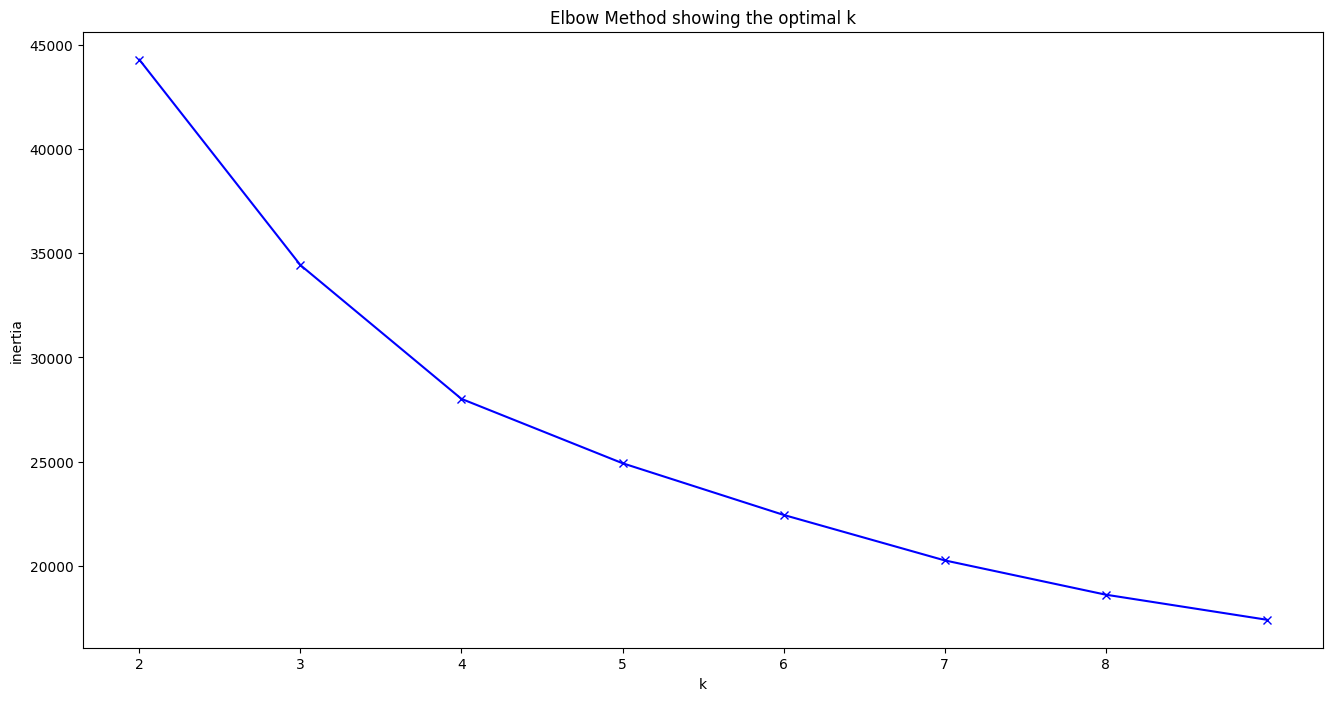

In [27]:
# Use the code from the encounter and adapt it to implement the elbow method
K = range(2, 10)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2_rel_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # shows the x symbols on the graph
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K), 1.0))
plt.title('Elbow Method showing the optimal k')

You should see a slight elbow for k = 4 which fits our knowledge of the dataset.

### Repeat k-means clustering with k = 4. Visualize the results and compare them with the weather from the `weather` column. Are the results aligned or rather different?

In [17]:
# Predict the labels and visualize the data. Adapt the code from the encounter.
# Note: in the encounter notebook we only visualize the data in a 2 dimensional space which means we are using only two columns (you can select column 1 - 'atemp' and column 2 - 'humidity')
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df2_rel_scaled)

clusters = kmeans.predict(df2_rel_scaled)
df_clustered_4 = df2_reloaded.copy() 
df_clustered_4["cluster"] = clusters
df_clustered_4

/Applications/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,temp,atemp,humidity,windspeed,cluster
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,2
2011-01-01 01:00:00,9.02,13.635,80,0.0000,2
2011-01-01 02:00:00,9.02,13.635,80,0.0000,2
2011-01-01 03:00:00,9.84,14.395,75,0.0000,2
2011-01-01 04:00:00,9.84,14.395,75,0.0000,2
...,...,...,...,...,...
2012-12-31 19:00:00,10.66,12.880,60,11.0014,2
2012-12-31 20:00:00,10.66,12.880,60,11.0014,2
2012-12-31 21:00:00,10.66,12.880,60,11.0014,2


In [19]:
# Visualize the weather clusters that are already in the data.
df_clustered_4.sample(50)

,temp,atemp,humidity,windspeed,cluster
datetime,,,,,
2012-01-02 02:00:00,14.76,15.910,34,30.0026,1
2011-06-14 04:00:00,22.14,25.760,60,16.9979,0
2012-07-18 11:00:00,36.90,42.425,42,0.0000,3
2012-07-03 06:00:00,28.70,32.575,65,8.9981,3
2011-02-25 18:00:00,13.12,14.395,49,32.9975,1
2011-07-04 17:00:00,32.80,36.365,46,0.0000,3
2011-01-01 01:00:00,9.02,13.635,80,0.0000,2
2011-11-11 21:00:00,12.30,15.150,45,11.0014,1
2012-07-07 06:00:00,30.34,35.605,74,7.0015,0


#### Conclusions:

Write down your thoughts here.